## Violation Plots

Notebook for initial visualizations on violation timing distribution for an animal using parsed events history.

In [5]:
import datajoint as dj
import blob_transformation as bt
import numpy as np
import pylab as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import pandas as pd
from io_utils import *

dj.blob.use_32bit_dims = True
%reload_ext autoreload
%autoreload 2


#### Read in session

In [6]:
bdata = dj.create_virtual_module('new_acquisition', 'bdatatest')
session_key = {'sessid': 884257
# session with valid viols: 884257
# session with tup viols: 880698
peh_blob = (bdata.ParsedEvents & session_key).fetch(as_dict=True)

[2022-09-17 09:59:06,061][WARNING]: MySQL server has gone away. Reconnecting to the server.


In [9]:
peh_blob[0].keys()

subject_session_key = {'ratname': 'R500'}
peh_blobs = (bdata.ParsedEvents & subject_session_key).fetch('peh', as_dict=True)

[2022-09-17 10:19:10,932][WARNING]: MySQL server has gone away. Reconnecting to the server.


KeyboardInterrupt: 

In [ ]:
"""Multisession read in"""
subject_session_key = {'ratname': 'R500'}
peh_blobs = (bdata.ParsedEvents & subject_session_key).fetch(as_dict=True)

In [4]:
n_sessions = 1
peh = bt.transform_blob(peh_blob[n_sessions-1]['peh'])
n_trials = len(peh)
itrial = 1

In [ ]:
def check_for_spoke_viol(peh_trial_states):
    violation_state = peh_trial_states['violation_state']
    if len(violation_state):
        # wfspoke state only occurs after the go cue
        # and violation only from early spoke if
        # this state doesn't exist
        wf_spoke_state = peh_trial_states['wait_for_spoke']
        if not len(wf_spoke_state):
            return True
    else:
        return False

def get_trial_start_time(peh_trial_states):
  
    # animal can enter cpoke state multiple times
    # before a trial starts and changes the dims
    # one entry = [in_time, out_time]
    # multi entry = [[i_t, o_t], [i_t, o_t]]

    cpoke_state = peh_trial_states['cpoke']
    if cpoke_state.size > 2: 
        # multi entry, grab last entry in time
        trial_start_time = cpoke_state[-1][0]
    else:
        # single entry, grab only in time
        trial_start_time = cpoke_state[0]
    return trial_start_time

def calculate_time_to_viol(peh):

    n_trials = len(peh)
    time_to_viol = []

    for itrial in range(n_trials):
        peh_trial_states = peh[itrial]['states']
        was_early_spoke_viol = check_for_spoke_viol(peh_trial_states)

        if was_early_spoke_viol:
            trial_start_time = get_trial_start_time(peh_trial_states)
            violation_time = peh_trial_states['violation_state'][0]

            time_to_viol.append(violation_time - trial_start_time )
    
    return time_to_viol


In [80]:
ttv = calculate_time_to_viol(peh)


(array([1., 2., 1., 2., 1., 2., 3., 0., 3., 5.]),
 array([0.5813 , 0.61286, 0.64442, 0.67598, 0.70754, 0.7391 , 0.77066,
        0.80222, 0.83378, 0.86534, 0.8969 ]),
 <BarContainer object of 10 artists>)

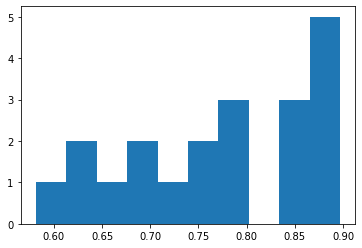

In [81]:
plt.hist(ttv)

In [87]:
peh[itrial]['waves']['go_sound_wave']

array([], shape=(0, 2), dtype=float64)